In [30]:
#Setup and read in log file
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

sns.set(style="darkgrid")

df = pd.read_csv('choucas_experience.tsv', sep='\t')
df['time']= df['time'] / 1000 #convert ms to seconds

dfTut = df[df['logSection'] == 'Tutorial']
dfExp = df[df['logSection'] == 'Experiment']

#Choose whether we want to run analysis on the tutorial or the experiment
df = dfTut
#df = dfExp

df

logSection  time                                            logText  value
12    Tutorial  0.00                      ----- Starting Tutorial -----    nan
13    Tutorial  0.00                                Initialising System    nan
14    Tutorial  0.00                               Loading base map OSM    nan
15    Tutorial  0.01                                  initialiseTable()    nan
16    Tutorial  0.01                                    Add Scenario: 1    nan
17    Tutorial  0.02                                    Add Scenario: 2    nan
18    Tutorial  0.02                                    Add Scenario: 3    nan
19    Tutorial  0.02                       Adding a new filter: Filter1    nan
20    Tutorial  0.03                              selectFilter(Filter1)    nan
21    Tutorial  0.08              setPrompt() oldPrompt=-1, newPrompt=0    nan
22    Tutorial  0.08  Change Hypothesis Colour Control - Hypothesis ...    nan
23    Tutorial  0.14                                 loadInitialItems()    nan
24    Tutorial  0.14              Initialisation completed successfully    nan
25    Tutorial  0.14                   ExperimentInstructions Step 1/13    nan
26    Tutorial  8.02                                      Welcome Form:    nan
27    Tutorial  8.02                                     userName: matt    nan
28    Tutorial  8.02                                        itSkills: 4    nan
29    Tutorial  8.02                                       gisSkills: 3    nan
30    Tutorial  8.02                                           ignKey:     nan
31    Tutorial  8.02                                         ignLogin:     nan
32    Tutorial  8.02                   ExperimentInstructions Step 2/13    nan
33    Tutorial  8.67                   ExperimentInstructions Step 3/13    nan
34    Tutorial  8.67              setPrompt() oldPrompt=-1, newPrompt=0    nan
35    Tutorial  9.78                   ExperimentInstructions Step 4/13    nan
36    Tutorial 10.37                   ExperimentInstructions Step 5/13    nan
37    Tutorial 11.04  Tree node hover start: filter=Filter1, nodeNam...    nan
38    Tutorial 12.07                Tree search box updated: Filter1, c    nan
39    Tutorial 12.26                Tree search box updated: Filter1, c    nan
40    Tutorial 12.35              Tree search box updated: Filter1, cro    nan
41    Tutorial 12.39              Tree search box updated: Filter1, cro    nan
..         ...   ...                                                ...    ...
144   Tutorial 40.60               setPrompt() oldPrompt=8, newPrompt=9    nan
145   Tutorial 41.51                       Adding a new filter: Filter3    nan
146   Tutorial 41.52                              selectFilter(Filter3)    nan
147   Tutorial 41.57              setPrompt() oldPrompt=-1, newPrompt=6    nan
148   Tutorial 42.66               setPrompt() oldPrompt=6, newPrompt=7    nan
149   Tutorial 42.66  Node Selected: filter=Filter3, nodeName=Remont...    nan
150   Tutorial 42.66  Filter Updated: Filter3 Buffer=, Distance=, Se...    nan
151   Tutorial 42.66                       updateZoneForCurrentFilter()    nan
152   Tutorial 42.66                                      recalcZones()    nan
153   Tutorial 42.77                         Scenarios recalculated in: 100.00
154   Tutorial 42.77                Current Zone Size (km2): Scenario 1   1.23
155   Tutorial 42.77  Tree node hover start: filter=Filter3, nodeNam...    nan
156   Tutorial 43.59                       bufferChanged() Filter3, 0.1    nan
157   Tutorial 43.59               setPrompt() oldPrompt=7, newPrompt=8    nan
158   Tutorial 43.59                              selectFilter(Filter3)    nan
159   Tutorial 43.65  Filter Updated: Filter3 Buffer=0.1, Distance=,...    nan
160   Tutorial 43.65                       updateZoneForCurrentFilter()    nan
161   Tutorial 43.74                 Zone recalculated for Filter3 in:   92.00
162   Tutorial 43.74                                  

In [31]:
#Stats Table
dfStats = pd.DataFrame(columns=['Statistic','Value'])

#Overpass Query Statistics
dfStats.loc[len(dfStats.index)+1] = ['Count runOverpassQuery', df.logText.str.count("runOverpassQuery").sum()]
meanOverpassQuery = df[df['logText'] == 'Overpass query response received in:'].value.mean() / 1000
dfStats.loc[len(dfStats.index)+1] = ['Avg Overpass Query Time (s)', meanOverpassQuery]

maxOverpassQuery = df[df['logText'] == 'Overpass query response received in:'].value.max() / 1000
dfStats.loc[len(dfStats.index)+1] = ['Max Overpass Query Time (s)', maxOverpassQuery]

#Filter Table Stats
dfStats.loc[len(dfStats.index)+1] = ['Count Adding a new filter', df.logText.str.count("Adding a new filter").sum()]
dfStats.loc[len(dfStats.index)+1] = ['Count bufferChanged', df.logText.str.count("bufferChanged").sum()]
dfStats.loc[len(dfStats.index)+1] = ['Count distanceChanged', df.logText.str.count("distanceChanged").sum()]
dfStats.loc[len(dfStats.index)+1] = ['Count checkboxChanged', df.logText.str.count("checkboxChanged").sum()]

dfStats

Statistic Value
1       Count runOverpassQuery     1
2  Avg Overpass Query Time (s)  9.54
3  Max Overpass Query Time (s)  9.54
4    Count Adding a new filter     3
5          Count bufferChanged     4
6        Count distanceChanged     2
7        Count checkboxChanged     3

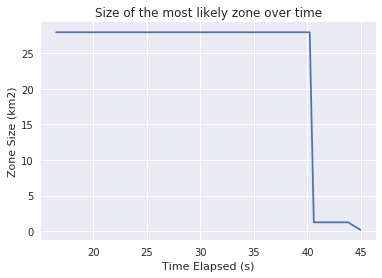

In [32]:
#Zone size over time graph
dfZoneSize = df[df['logText'].str.contains('Current Zone Size')]
#dfFilterCalc = dfFilterCalc[~dfFilterCalc['logText'].str.contains('Filter1')]
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Size of the most likely zone over time')
plt.xlabel('Time Elapsed (s)')
plt.ylabel('Zone Size (km2)')
plt.plot(dfZoneSize['time'], dfZoneSize['value']);

In [33]:
#Zone calculation statistics
dfFilterCalc = df[df['logText'].str.contains('Zone recalculated for Filter')]
counts = dfFilterCalc.groupby('logText')['value'].count()
means = dfFilterCalc.groupby('logText')['value'].mean()
maxs = dfFilterCalc.groupby('logText')['value'].max()
dfFilterCalcStats = pd.concat([counts, means, maxs], axis=1)
dfFilterCalcStats.columns = ['Filter Zone Calculations','Avg Calc Time', 'Max Calc Time']
dfFilterCalcStats

Filter Zone Calculations  Avg Calc Time  \
logText                                                                       
Zone recalculated for Filter1 in:                          2          16.00   
Zone recalculated for Filter2 in:                          3         258.67   
Zone recalculated for Filter3 in:                          1          92.00   

                                    Max Calc Time  
logText                                            
Zone recalculated for Filter1 in:           26.00  
Zone recalculated for Filter2 in:          346.00  
Zone recalculated for Filter3 in:           92.00

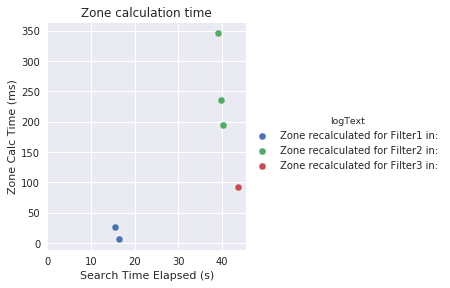

In [34]:
#Zone Calculation Graph
dfFilterZoneCalcs = df[df['logText'].str.contains('Zone recalculated for Filter')]
fig = sns.pairplot(x_vars=["time"], y_vars=["value"], data=dfFilterZoneCalcs, hue="logText", size=4)
plt.xlim(0, None)
plt.xlabel("Search Time Elapsed (s)")
plt.ylabel("Zone Calc Time (ms)")
plt.title("Zone calculation time")
plt.show(fig)

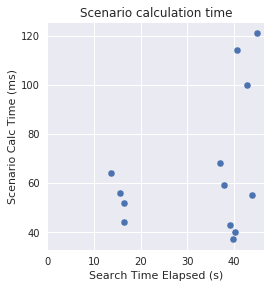

In [35]:
#Scenario Calculation Graph
dfScenarioCalcs = df[df['logText'].str.contains('Scenarios recalculated in:')]
fig = sns.pairplot(x_vars=["time"], y_vars=["value"], data=dfScenarioCalcs, size=4)
plt.xlim(0, None)
plt.xlabel("Search Time Elapsed (s)")
plt.ylabel("Scenario Calc Time (ms)")
plt.title("Scenario calculation time")
plt.show(fig)